# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [4]:
# Preview the dataset
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 22 entries, 1900 to 1996
Freq: A-DEC
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   winning_times  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes
None


,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

<AxesSubplot:title={'center':"Men's 400m Olympic Games 1900-1990"}, xlabel='Year', ylabel='Winning Times'>

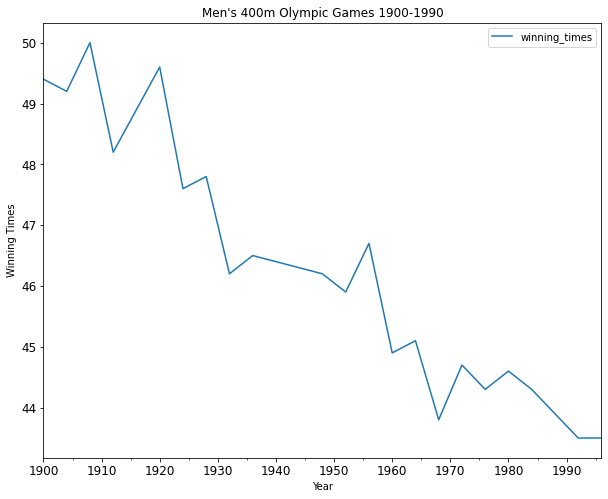

In [12]:
# Plot the time series
data.plot(figsize=(10,8), title="Men's 400m Olympic Games 1900-1990", xlabel='Year', ylabel='Winning Times', fontsize=12)

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [13]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


In [32]:
data_diff.shape

(21, 1)

<AxesSubplot:title={'center':"Men's 400m Olympic Games 1900-1990 (Differenced)"}, xlabel='Diferrenced Winnings'>

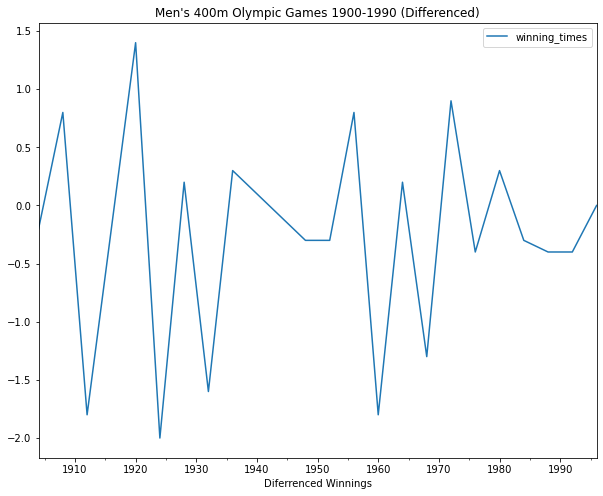

In [69]:
data_diff.plot(figsize=(10,8), xlabel='Diferrenced Winnings', title="Men's 400m Olympic Games 1900-1990 (Differenced)")

In [68]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(data_diff)
results

(0.12113600204810519,
 0.9674748699553254,
 7,
 13,
 {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 16.77773800372567)

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

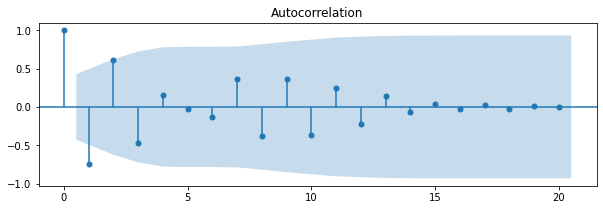

In [110]:
# import library
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(data_diff, ax=ax, lags=20);



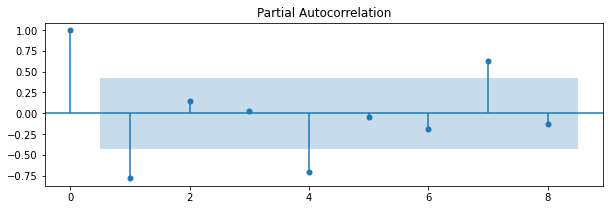

In [61]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(10,3))
plot_pacf(data_diff, ax=ax, lags=8);

In [ ]:
Significant CORRELATION AT 1, 4, 7
ARMA(1,1)

In [101]:
"""
from ACF plot above MA(1) or ARMA(1,1) model would be the appropriate model

"""

'\nfrom ACF plot above MA(1) or ARMA(1,1) model would be the appropriate model\n\n'

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [73]:
# import ARIMA from statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# Instantiate an ARIMA(p=1,d=0, q=1) model to the differenced data
arma_1 = ARIMA(data_diff, order=(1,0,1))

# Fit model to data
first_arma = arma_1.fit()

first_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Sat, 27 Aug 2022   AIC                             47.916
Time:                        14:07:30   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.350      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.680      -0.441       0.675
sigma2         0.3784      0.181      2.094      0.036       0.024       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.90   Prob(JB):                         0.54
Heteroskedasticity (H):               0.31   Skew:                             0.23
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# Print out the estimate for the constant and for theta
first_arma.params

const    -0.285008
ar.L1    -0.770748
ma.L1     0.117216
sigma2    0.378429
dtype: float64

In [114]:
# Instantiate an ARMA(p=4,d=0, q=1) model to the differenced data
arma_2 = ARIMA(data_diff, order=(4,0,1))

# Fit model to data
second_arma = arma_2.fit()

second_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 -16.194
Date:                Sat, 27 Aug 2022   AIC                             46.388
Time:                        19:10:18   BIC                             53.700
Sample:                    12-31-1904   HQIC                            47.975
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2915      0.066     -4.445      0.000      -0.420      -0.163
ar.L1         -0.7879      0.515     -1.530      0.126      -1.797       0.222
ar.L2          0.1405      0.491      0.286      0.775      -0.822       1.103
ar.L3         -0.2630      0.426     -0.617      0.537      -1.099       0.573
ar.L4         -0.5572      0.323     -1.723      0.085      -1.191       0.076
ma.L1          0.2206      0.793      0.278      0.781      -1.333       1.774
sigma2         0.2418      0.113      2.131      0.033       0.019       0.464
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.94   Prob(JB):                         0.68
Heteroskedasticity (H):               0.33   Skew:                            -0.35
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
# Print out the estimate for the constant and for theta
second_arma.params

const    -0.291547
ar.L1    -0.787949
ar.L2     0.140451
ar.L3    -0.263000
ar.L4    -0.557228
ma.L1     0.220578
sigma2    0.241842
dtype: float64

In [116]:
# Instantiate an ARIMA(p=1,d=1q=1) model to the differenced data
arma_3 = ARIMA(data_diff, order=(1,1,1))

# Fit model to data
third_arma = arma_3.fit()

third_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -21.643
Date:                Sat, 27 Aug 2022   AIC                             49.287
Time:                        19:10:48   BIC                             52.274
Sample:                    12-31-1904   HQIC                            49.870
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7061      0.154     -4.587      0.000      -1.008      -0.404
ma.L1         -0.9983     22.970     -0.043      0.965     -46.019      44.022
sigma2         0.4026      9.201      0.044      0.965     -17.630      18.435
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.65   Prob(JB):                         0.68
Heteroskedasticity (H):               0.42   Skew:                            -0.13
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
third_arma.params

ar.L1    -0.706074
ma.L1    -0.998278
sigma2    0.402551
dtype: float64

In [127]:
#import SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate & fit model to differenced data
sarimax_1 = SARIMAX(data_diff, order=(1,0,1)).fit()

# summary
print(sarimax_1.summary())
print('-------------------------'*2)
print('------------------------------------------------------')
# parameters

print("SARIMAX parameters: " '\n', sarimax_1.params)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -23.601
Date:                Sat, 27 Aug 2022   AIC                             53.202
Time:                        19:15:24   BIC                             56.335
Sample:                    12-31-1904   HQIC                            53.882
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8072      0.181     -4.465      0.000      -1.162      -0.453
ma.L1          0.3450      0.290      1.188      0.235      -0.224       0.914
sigma2         0.5405      0.232      2.327      0.0

In [128]:
# Instantiate & fit model to differenced data
sarimax_2 = SARIMAX(data_diff, order=(4,0,1)).fit()

# summary
print(sarimax_2.summary())
print('-------------------------'*2)
print('------------------------------------------------------')
# parameters

print("SARIMAX parameters: " '\n', sarimax_2.params)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:               SARIMAX(4, 0, 1)   Log Likelihood                 -18.863
Date:                Sat, 27 Aug 2022   AIC                             49.726
Time:                        19:16:09   BIC                             55.993
Sample:                    12-31-1904   HQIC                            51.086
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9507      0.326     -2.920      0.003      -1.589      -0.313
ar.L2          0.4441      0.402      1.104      0.270      -0.345       1.233
ar.L3          0.3577      0.659      0.543      0.5

## What is your final model? Why did you pick this model?

In [99]:
# Your comments here
"""
Final Model is ARIMA (1,0,1)
It has the least AIC with the least parameters
"""

'\nFinal Model is ARIMA (1,0,1)\nIt has the least AIC with the least parameters\n'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 